<a href="https://colab.research.google.com/github/cdavidrios/TDS1_SerieFourier/blob/main/SerieFourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Serie de Fourier**
**Autores**
* Daniel Escobar Grisales
* Cristian David Ríos Urrego
* Juan Rafael Orozco Arroyave

# Introducción

La Serie de Fourier es una herramienta fundamental en el análisis de señales periódicas, ya que permite expresar este tipo de funciones como una suma infinita de funciones sinusoidales (senos, cosenos o exponenciales complejas),cada una asociada a una frecuencia armónica específica, lo que facilita el estudio y compresión de su comportamiento en el dominio de la frecuencia. Esta descomposición revela cómo se distribuye la potencia en diferentes componetes de la señal y permite entender, manipular y reconstruir señales en el dominio de la frecuencia.

En este notebook, exploraremos paso a paso cómo construir y analizar la serie de Fourier de una señal periódica simple: un tren de pulsos unipolar.

# Funciones y librerias necesarias

In [ ]:
from sympy import integrate, exp, symbols
import numpy as np
import matplotlib.pyplot as plt

def serie_fourier(Cn, N, T, f, fs, t, plot_cn = False):
    n_armonics = np.arange(-N,N+1,1)
    freq_spectrum = (n_armonics*W0)/(2*np.pi)
    #Compute n coeficients
    #Cn_eval = [np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0]]

    f_t = 0
    Cn_eval = []
    for i in n_armonics:
        Cn_eval.append(np.abs(np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)[0])) # "fromiter" convierte
        # los valores complejos simbólicos en complejos numéricos. Como genera lista, hay que evaluar el resultado
        # en la posición [0]
        armonic = np.fromiter([Cn.evalf(subs={n:i})], dtype=complex)*np.exp((1j*i*2*np.pi*f*t))
        f_t = f_t + armonic
    if plot_cn:
        for i in n_armonics:
            if(i>=0):
               print("Freq = "+str((1/T)*i)+" Hz"+":"+" |c_"+str(i)+"| = "+str(Cn_eval[i+N]))

        Power_acum = np.sum([c**2 for c in Cn_eval])
        print('La potencia acumulada por los '+ str(N) + ' armonicos es ' + str(Power_acum))


    plt.figure(figsize=(16,5))
    plt.subplot(121)
    plt.stem(freq_spectrum,np.asarray(Cn_eval)**2)
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel('Potencia [lineal]')
    plt.title("Espectro")

    plt.subplot(122)
    plt.plot(t,f_t)
    plt.xlabel("Tiempo (s)")
    plt.ylabel('Amplitud')
    plt.title("Serie de Fourier N = "+str(N)+" Terminos")
    plt.grid()
    plt.show()

# Definiciones

La serie de Fourier compleja permite representar una señal periódica $f(t)$ como una suma infinita de exponenciales complejas:

$$f(t) = \sum_{n=-∞}^{∞}{c_n e^{j2πnf_ot}}$$


donde los coeficientes $c_n$ se calculan como:


$$c_n = \frac{1}{T_o}∫_{T_o}f(t)e^{-j2πnf_ot}dt $$


Alternativamente, también se puede expresar la serie en su forma real, como combinación de senos y cosenos:

$$f(t) = \frac{a_0}{2}+ \sum_{n=0}^{∞}a_ncos(nω_0t)+ \sum_{n=0}^{∞}b_nsin(nω_0t) $$

con los coeficientes:

$$a_0 = \frac{2}{T_0}∫_{T_0}f(t)dt; a_n=\frac{2}{T_0}∫_{T_0}f(t)cos(nω_0t)dt; b_n=\frac{2}{T_0}∫_{T_0}f(t)sin(nω_0t)dt$$

La relación entre los coeficientes reales y complejos se da por:

$$|c_n| = \sqrt{a_n^2 + b_n^2 }$$



## Serie de un tren de pulsos unipolar

Supongamos una señal periódica $f(t)$ con frecuencia fundamental de 1 kHz (es decir, $T=0.001$s), definida por:

$$f(t) = \begin{cases} 1, & |t| < \frac{T}{4} \\ 0, &  \frac{T}{4} \leq |t| < \frac{3T}{4} \\ 1, & \frac{3T}{4} \leq |t| < T
\end{cases}$$

Esta señal se repite cada $T$ segundos y corresponde a un tren de pulsos unipolar simétrico.



### Señal original

La siguiente figura muestra tres períodos de la señal definida anteriormente.

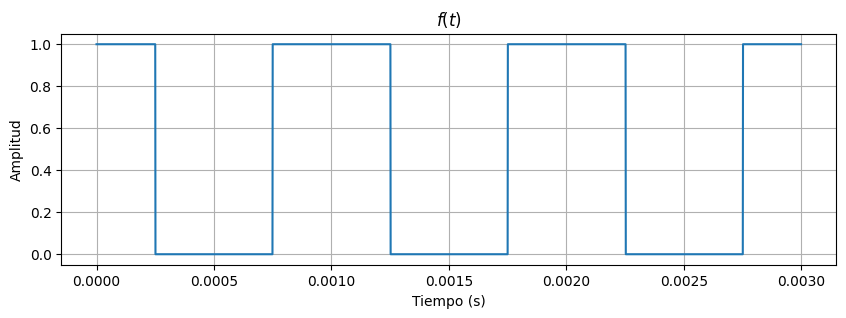

In [ ]:
f=1000
fs = 1e6
T=1/f
N_periods = 3
A=1
W0 = 2*np.pi*f # Frecuencia fundamental de la función

time_period = np.arange(0,T,1/fs)
ft_real_period = [A if 0 <= t <= T/4 or 3*T/4 <= t <= T else 0 for t in time_period ]
time = np.arange(0,N_periods*T,1/fs)
#Graficar X cantidad de periodos de la señal
ft_real = np.hstack([ft_real_period for p in range(N_periods)])
plt.figure(figsize=(10,3))
plt.plot(time, ft_real[0:len(time)])
plt.xlabel("Tiempo (s)")
plt.ylabel('Amplitud')
plt.title("$f(t)$")
plt.grid()

### Serie compleja de Fourier (análisis espectral y reconstrucción)

La señal periódica mostrada puede representarse mediante una serie de Fourier, es decir, como una suma infinita de senos y cosenos (o exponenciales complejas) ponderados por coeficientes que indican cuánta potencia aporta cada frecuencia asociada a un armónico múltiplo de la frecuencia fundamental. Esta representación permite descomponer $f(t)$ como:

$$f(t) = \sum_{n=-\infty}^{\infty} C_n\exp^{j2\pi f_0 t}$$

donde:
* $C_n$ son los coeficientes complejos que determinan la magnitud y fase de cada componente
* $f_0 = 1$kHz es la frecuencia fundamental (1kHz)


En la práctica, no es posible sumar infinitos términos. Esto plantea una pregunta clave:
**¿Cuántos términos son suficientes para aproximar la señal de forma razonable?**


A continuación, analizamos la reconstrucción de la señal $f(t)$ utilizando únicamente cinco armónicos. Se observa cómo estos cinco términos afectan tanto su representación espectral como su forma en el dominio del tiempo.

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


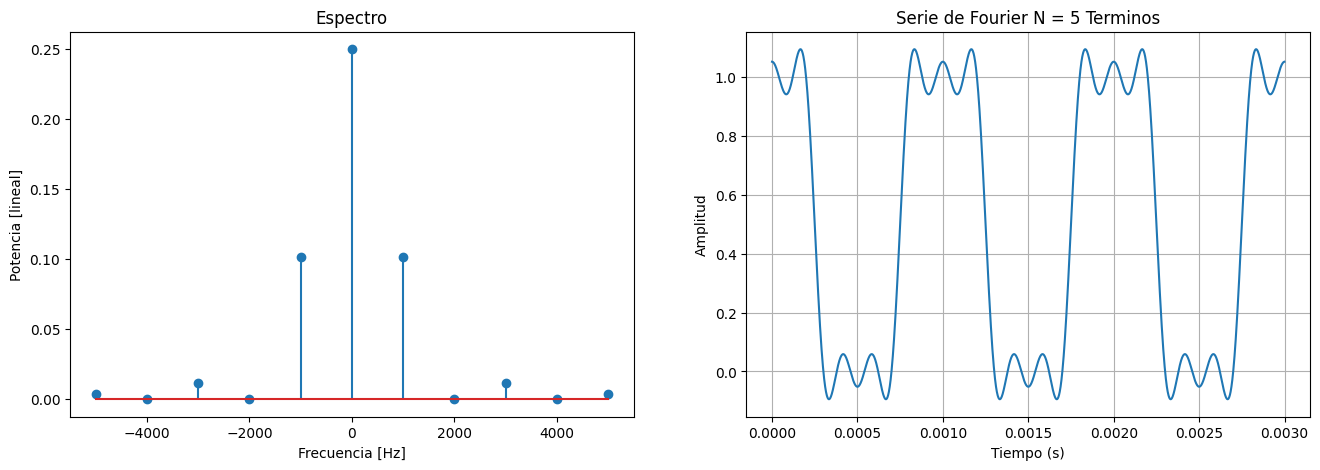

In [ ]:
ft = A
n,t_simbol = symbols('n t_simbol')
N = 5 # N armónicos

Cn = (1/T)*integrate(ft*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/4,T/4))

serie_fourier(Cn,N,T,f,fs, time)

* El panel izquierdo muestra el espectro de amplitud de la señal, es decir, los valores $|C_n|$. Se observa un espectro simétrico con una componente DC ($|C_0|\neq 0$), indicando que la señal tiene un valor promedio distinto de cero. Además, cada armónico aparece en múltiplos enteros de la frecuencia fundamental, como se espera en una señal periódica.

* El panel derecho presenta la reconstrucción temporal de la señal a partir de solo cinco términos de la serie. Aunque no es una réplica perfecta (debido al truncamiento), la forma general del tren de pulsos ya se hace evidente. Se notan oscilaciones cerca de los bordes del pulso, conocidas como el fenómeno de Gibbs, típico al aproximar discontinuidades con un número finito de armónicos.


### Aumentando el número de armónicos

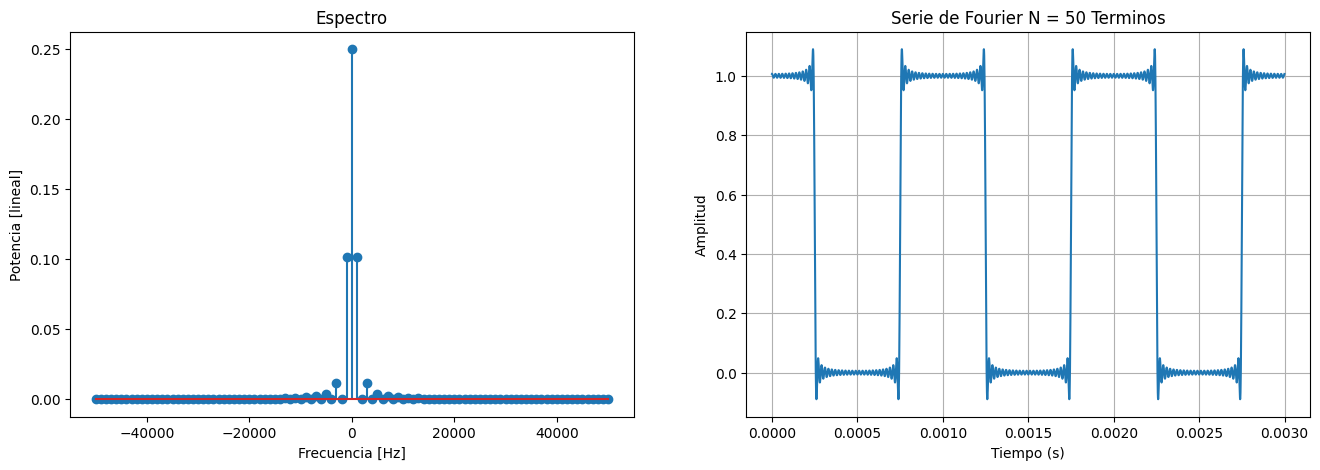

In [ ]:
ft = A
n,t_simbol = symbols('n t_simbol')
N = 50 # N armónicos

Cn = (1/T)*integrate(ft*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/4,T/4))

serie_fourier(Cn,N,T,f,fs, time)

Ahora aumentamos el número de armónicos a 50. Se observa que:

* Aunque el fenómeno de Gibbs persiste, su amplitud relativa disminuye.
* La señal reconstruida se aproxima mucho mejor a la forma original.

Al sumar más componentes en la serie, se mejora progresivamente la fidelidad temporal de la reconstrucción.

Este análisis muestra cómo la reconstrucción de una señal periódica mediante su serie de Fourier depende directamente del número de armónicos considerados. Tomar muy pocos términos puede resultar en una señal pobremente aproximada, donde se pierde gran parte de la forma original. Por otro lado, usar demasiados términos puede incrementar el costo computacional sin un beneficio significativo, especialmente cuando los coeficientes de alta frecuencia tienen muy poca energía. En este contexto, el teorema de Parseval ofrece una guía útil para elegir la contidad de componentes.

## Teorema de Parseval

El teorema de Parseval establece una relación fundamental entre el dominio del tiempo y el dominio de la frecuencia. Específicamente, indica que la potencia total de una señal periódica puede calcularse como la suma de la magnitud de sus coeficientes al cuadrado. Para una señal $f(t)$ de período $T$, este teorema se expresa como:

$$
\frac{1}{T} \int_{0}^{T} |f(t)|^2 \, dt = \sum_{n=-\infty}^{\infty} |c_n|^2
$$

como la potencia total de la señal se reparte entre los coeficientes de Fourier, se puede analizar qué porcentaje de la potencia está concentrado en los primeros $N$ armónicos. Así, es posible encontrar un equilibrio adecuado entre fidelidad de reconstrucción y eficiencia, seleccionando solo las componentes que realmente aportan al contenido de potencia de la señal.

Por ejemplo, en el caso anterior, ¿cuántos coeficientes son necesarios para acumular al menos el 98% de la potencia total de la señal?

La potencia de la señal, calculada sobre un período, es:

$$\frac{1}{T} \int_{0}^{T} |f(t)|^2 = 0.5$$

Por lo tanto, el 98% de esta potencia equivale a $0.5 \times 0.98 = 0.49$

Encontremos cuantos coeficientes son necesarios para acumular el 98% de la potencia de la señal

Freq = 0.0 Hz: |c_0| = 0.5
Freq = 1000.0 Hz: |c_1| = 0.3183098861837907
Freq = 2000.0 Hz: |c_2| = 1.949085916259688e-17
Freq = 3000.0 Hz: |c_3| = 0.1061032953945969
Freq = 4000.0 Hz: |c_4| = 1.949085916259688e-17
Freq = 5000.0 Hz: |c_5| = 0.06366197723675815
Freq = 6000.0 Hz: |c_6| = 1.9490859162596877e-17
Freq = 7000.0 Hz: |c_7| = 0.04547284088339867
Freq = 8000.0 Hz: |c_8| = 1.949085916259688e-17
Freq = 9000.0 Hz: |c_9| = 0.0353677651315323
Freq = 10000.0 Hz: |c_10| = 1.949085916259688e-17
Freq = 11000.0 Hz: |c_11| = 0.028937262380344612
La potencia acumulada por los 11 armonicos es 0.49157592700819885


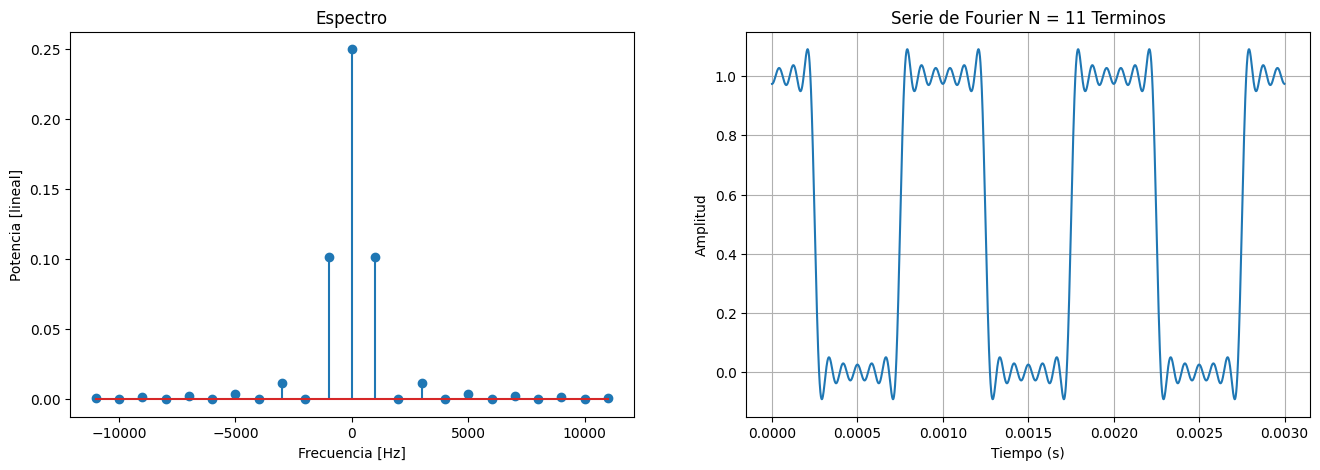

In [ ]:
ft = A
n,t_simbol = symbols('n t_simbol')
N = 11 # N armónicos

Cn = (1/T)*integrate(ft*exp(-(1j*W0*n*t_simbol)),(t_simbol,-T/4,T/4))

serie_fourier(Cn,N,T,f,fs, time, True)

Tras calcular la suma acumulada de los cuadrados de los coeficientes $|C_n|^2$, se encuentra que basta con 11 armónicos para alcanzar una potencia de 0.492, lo que representa el 98.4% de la potencia original.

Este subconjunto de frecuencias constituye el ancho de banda efectivo de la señal. En este caso, dado que cada armónico se ubica en múltiplos de la frecuencia fundamental (1 kHz), el ancho de banda corresponde a:

$$\text{BW} = 11 \times 1\text{kHz} \times 2 = 22\text{kHz}$$

El ancho de banda (BW) se definie como el rango de frecuencias que contiene la mayor parte de su potencia o energía de una señal. Este concepto es clave en comunicaciones y procesamiento de señales, ya que determina la capacidad del canal necesario para transmitir o reconstruir la señal sin pérdida significativa de información.